# 🚧 Étude et analyse des accidents corporels de la circulation routière 🚗

Les [datasets](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/) sont disponibles sur le site officiel [www.data.gouv.fr](www.data.gouv.fr)

**Description:**  

Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. 

**Métadonnées:**

Pour avoir plus d'informations sur les colonnes et leurs descriptions, voir le fichier pdf: `description-des-bases-de-donnees-annuelles-2022.pdf`

### I. Importation des librairies

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### II. Importation des datasets

In [13]:
df_caracteristiques = pd.read_csv("../data/carcteristiques-2022.csv", sep=';')
df_caracteristiques.head()

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000"
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000"
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775"


In [9]:
df_lieux = pd.read_csv("../data/lieux-2022.csv", sep=';', low_memory=False)
df_lieux.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000003,3,ROND POINT DE BREZILLET,0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50
3,202200000004,4,QUATORZE JUILLET (RUE DU),0,NaN,1,1,0,2,(1),(1),1,NaN,4,1,0,1,30
4,202200000005,3,ROUTE DE JEAN MOULIN-RN 538,0,NaN,2,2,0,1,8,0,1,NaN,-1,1,0,1,80


In [10]:
df_vehicules = pd.read_csv("../data/vehicules-2022.csv", sep=';')
df_vehicules.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000001,813 952,A01,1,2,0,2,1,9,1,NaN
1,202200000001,813 953,B01,1,7,0,2,2,1,1,NaN
2,202200000002,813 950,B01,2,7,0,2,8,15,1,NaN
3,202200000002,813 951,A01,2,10,0,2,1,1,1,NaN
4,202200000003,813 948,A01,2,7,0,2,1,2,1,NaN


In [11]:
df_usagers = pd.read_csv("../data/usagers-2022.csv", sep=';')
df_usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1


### III. Exploration et transformation

Nombre d'accidents

In [18]:
len(df_caracteristiques)

55302

Les types de données

In [16]:
print(df_caracteristiques.dtypes)

Accident_Id     int64
jour            int64
mois            int64
an              int64
hrmn           object
lum             int64
dep            object
com            object
agg             int64
int             int64
atm             int64
col             int64
adr            object
lat            object
long           object
dtype: object


Renommer les colonnes

In [25]:
df_caracteristiques = df_caracteristiques.rename(columns={"long": "lon", "Accident_Id": "Num_Acc"})

Conversion des colonnes latitude, longitude d'objet à float

In [41]:
df_caracteristiques['lat'] = df_caracteristiques['lat'].str.replace(',', '.').astype(float)
df_caracteristiques['lon'] = df_caracteristiques['lon'].str.replace(',', '.').astype(float)

Les départements

In [17]:
df_caracteristiques['dep'].unique()

array(['26', '25', '22', '16', '13', '12', '10', '09', '06', '03', '02',
       '75', '94', '93', '92', '76', '68', '972', '63', '62', '51', '2B',
       '65', '33', '71', '89', '61', '29', '38', '14', '60', '45', '73',
       '53', '24', '27', '17', '48', '973', '77', '67', '988', '08', '56',
       '69', '91', '78', '64', '59', '49', '42', '37', '34', '32', '31',
       '11', '35', '47', '86', '01', '74', '79', '2A', '46', '39', '72',
       '05', '18', '19', '971', '987', '66', '84', '85', '95', '57', '54',
       '52', '50', '44', '974', '83', '28', '15', '07', '80', '30', '41',
       '82', '55', '43', '40', '04', '986', '88', '36', '87', '21', '976',
       '81', '58', '70', '90', '23', '977', '978', '975'], dtype=object)

Nombre de personnes impliqués dans les accidents

In [17]:
len(df_usagers)

126662

Traitement des valeurs nulls

In [21]:
print(df_caracteristiques.info())
print(df_lieux.info())
print(df_vehicules.info())
print(df_usagers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Accident_Id  55302 non-null  int64 
 1   jour         55302 non-null  int64 
 2   mois         55302 non-null  int64 
 3   an           55302 non-null  int64 
 4   hrmn         55302 non-null  object
 5   lum          55302 non-null  int64 
 6   dep          55302 non-null  object
 7   com          55302 non-null  object
 8   agg          55302 non-null  int64 
 9   int          55302 non-null  int64 
 10  atm          55302 non-null  int64 
 11  col          55302 non-null  int64 
 12  adr          54069 non-null  object
 13  lat          55302 non-null  object
 14  long         55302 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 18 columns):
 #   Column   Non-Null Count  

**Colonne `grav`:**  
Gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :   
1 – Indemne   
2 – Tué   
3 – Blessé hospitalisé   
4 – Blessé léger  

In [24]:
df_death = df_usagers[df_usagers['grav'] == -1]
len(df_death)

241

Il n'y a pas de gravité associé au code **-1**.

> Fusionner les dataframes sur Num_Acc (AccidentID)

In [44]:
df = pd.merge(df_caracteristiques, df_lieux, on='Num_Acc', how='left')
df = pd.merge(df, df_vehicules, on='Num_Acc', how='left')
df = pd.merge(df, df_usagers, on=['Num_Acc', 'id_vehicule'], how='left')

In [51]:
df.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,...,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,19,10,2022,16:15,1,26,26198,2,3,...,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,20,10,2022,08:34,1,25,25204,2,3,...,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,20,10,2022,08:34,1,25,25204,2,3,...,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,20,10,2022,17:15,1,22,22360,2,6,...,1,1,2002.0,0,1,0,-1,-1,-1,-1


### IV. Visualisation des données

Distribution des accidents selon le mois

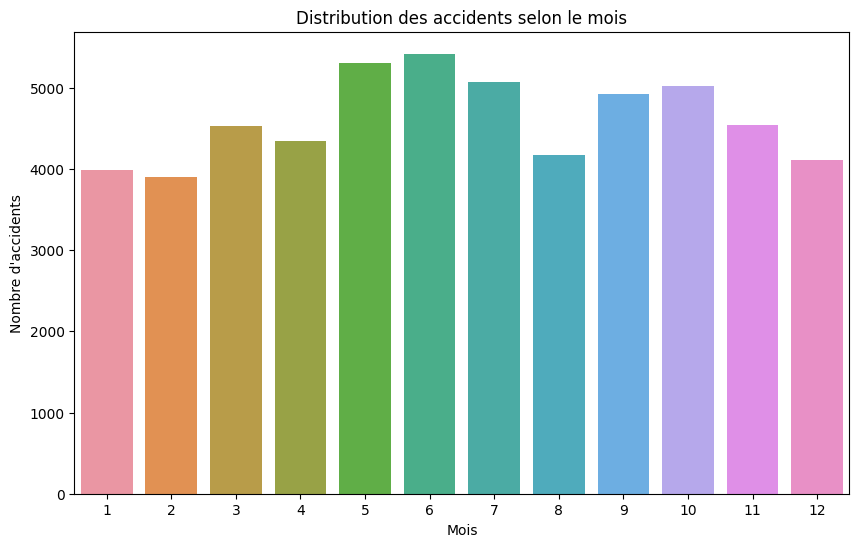

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_caracteristiques, x='mois')
plt.title('Distribution des accidents selon le mois')
plt.xlabel('Mois')
plt.ylabel("Nombre d'accidents")
plt.show()

Distribution des accidents selon les conditions de luminosité

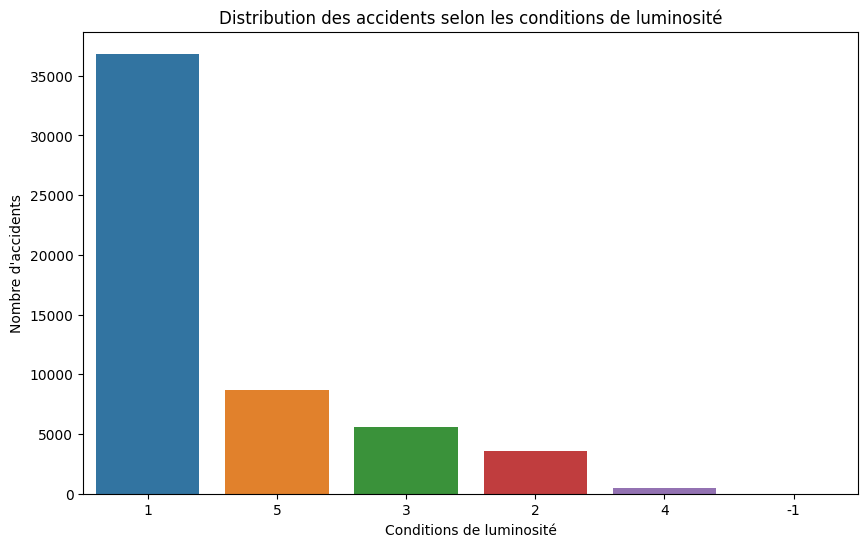

In [55]:
plt.figure(figsize=(10, 6))
lum_order = df_caracteristiques['lum'].value_counts().index
sns.countplot(data=df_caracteristiques, x='lum', order=lum_order)
plt.title('Distribution des accidents selon les conditions de luminosité')
plt.xlabel('Conditions de luminosité')
plt.ylabel('Nombre d\'accidents')
plt.show()

Distribution des accidents selon le type de collision

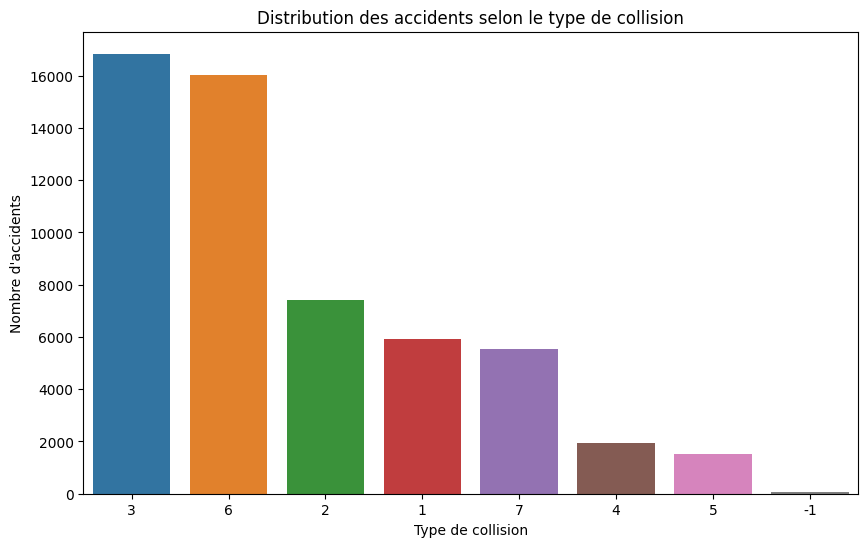

In [59]:
plt.figure(figsize=(10, 6))
col_order = df_caracteristiques['col'].value_counts().index
sns.countplot(data=df_caracteristiques, x='col', order=col_order)
plt.title('Distribution des accidents selon le type de collision')
plt.xlabel('Type de collision')
plt.ylabel('Nombre d\'accidents')
plt.show()